<a href="https://colab.research.google.com/github/venki666/cpe476/blob/master/notebooks/DDWR_Kinematics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# DDMWR Forward Kinematics

## Differential drive

$ (x, y, \theta) $ - the pose of the robot  
$ v_l $, $ v_r $ - the speed of the left and right wheel  
$ t $ - the driving time  
$ l $ - the distance between the wheels  

Radius:

$$ R = \frac{l}{2} \frac{v_r + v_l}{v_r - v_l} $$

ICC - Instantaneous center of curvature:

$$ ICC = [ x - R \sin{\theta} , y + R \cos{\theta} ] $$

Angular speed:

$$ \omega = \frac{v_r - v_l}{l} $$

### Forward kinematics

\begin{equation}
    \begin{pmatrix}
    x' \\
    y' \\
    \theta'
    \end{pmatrix} = 
    \begin{pmatrix}
    \cos{\omega t} & -\sin{\omega t} & 0\\
    \sin{\omega t} & \cos{\omega t}  & 0\\
    0 & 0 & 1
    \end{pmatrix} \cdot
    \begin{pmatrix}
    x - ICC_{x} \\
    y - ICC{y} \\
    \theta
    \end{pmatrix} +
    \begin{pmatrix}
    ICC_{x} \\
    ICC{y} \\
    \omega t
    \end{pmatrix}
\end{equation}


In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def diffdrive(x, y, theta, v_l, v_r, t, l):
    '''
    x - starting x coordinate
    y - starting y coordinate
    theta - starting orientation
    v_l - velocity of the left wheel
    v_r - velocity of the right wheel
    t - driving time
    l - distance between the wheels
    '''

    # v_l = v_r -> robot goes straight (v_r - v_l == 0 means the radius is infinite)
    if v_l == v_r:
        v = (v_l + v_r) / 2
        s = v * t
        x_n = x + s * np.cos(theta)
        y_n = y + s * np.sin(theta)
        theta_n = theta

    # v_l != v_r -> robot circles
    else:
        R = (l / 2) * ((v_r + v_l) / (v_r - v_l))
        x_ICC = x - R * np.sin(theta)
        y_ICC = y + R * np.cos(theta)
        omega = (v_r - v_l) / l
        dtheta = omega * t
        theta_n = theta + dtheta
        dx = x - x_ICC
        dy = y - y_ICC
        x_n = x_ICC + dx * np.cos(dtheta) - dy * np.sin(dtheta)
        y_n = y_ICC + dx * np.sin(dtheta) + dy * np.cos(dtheta)

    return x_n, y_n, theta_n

### Example

The distance $ l $ between the wheels of the robot is $ 0.5 m $.  
After reaching position $ x = 1.5 m, y = 2.0 m, \theta = \frac{\pi}{2}$, the robot executes the following sequence of steering commands:
$$ c_1 = (v_l = 0.3 m/s, v_r = 0.3 m/s, t = 3 s) $$
$$ c_2 = (v_l = 0.1 m/s, v_r = -0.1 m/s, t = 1 s) $$
$$ c_3 = (v_l = 0.2 m/s, v_r = 0 m/s, t = 2 s) $$
The position of the robot after the execution of each command in the sequence is:

Executing c1...
p1 = (1.500000, 2.900000, 1.570796)
Executing c2...
p2 = (1.500000, 2.900000, 1.370796)
Executing c3...
p3 = (1.654731, 3.265973, 0.970796)


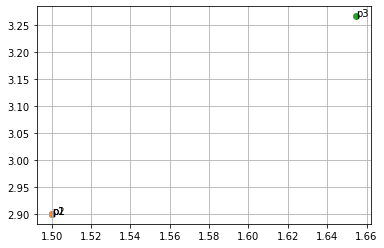

In [3]:
l = 2.0

x, y, theta = 1.5, 2, np.pi / 2

commands = [
    (0.3, 0.3, 3),  # c1
    (0.1, -0.1, 2), # c2
    (0.2, 0, 4)     # c3
]

for i, (v_l, v_r, t) in enumerate(commands):
    print("Executing c{}...".format(i + 1))
    x, y, theta = diffdrive(x, y, theta, v_l, v_r, t, l)    
    print("p{} = ({:2f}, {:2f}, {:2f})".format(i + 1, x, y, theta))
    plt.scatter([x], [y])
    plt.text(x, y, "p{}".format(i + 1))

plt.grid()

starting pose: x: 1.500000, y: 2.000000, theta: 1.570796
after motion 1: x: 1.500000, y: 2.900000, theta: 1.570796
after motion 2: x: 1.500000, y: 2.900000, theta: 0.770796
after motion 3: x: 1.913411, y: 2.710799, theta: -2.429204


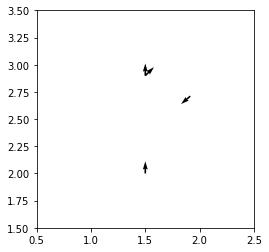

In [6]:
import numpy as np
import matplotlib.pyplot as plt
#from diffdrive import diffdrive
plt.gca().set_aspect('equal')
# set the distance between the wheels and the initial robot position
l = 0.5
ntheta = 0.0
x, y, theta = 1.5, 2.0, np.pi/2.0
# plot the starting position
plt.quiver(x, y, np.cos(theta), np.sin(theta))
print("starting pose: x: %f, y: %f, theta: %f" % (x, y, theta))
# first motion
v_l = 0.3
v_r = 0.3
t = 3
x, y, ntheta = diffdrive(x, y, theta, v_l, v_r, t, l)
plt.quiver(x, y, np.cos(ntheta), np.sin(ntheta))
print("after motion 1: x: %f, y: %f, theta: %f" % (x, y, ntheta))
# second motion
v_l = 0.1
v_r = -0.1
t = 2
x, y, ntheta = diffdrive(x, y, theta, v_l, v_r, t, l)
plt.quiver(x, y, np.cos(ntheta), np.sin(ntheta))
print("after motion 2: x: %f, y: %f, theta: %f" % (x, y, ntheta))
# third motion
v_l = 0.5
v_r = 0.0
t = 4
x, y, ntheta = diffdrive(x, y, theta, v_l, v_r, t, l)
plt.quiver(x, y, np.cos(ntheta), np.sin(ntheta))
print("after motion 3: x: %f, y: %f, theta: %f" % (x, y, ntheta))
plt.xlim([0.5, 2.5])
plt.ylim([1.5, 3.5])
plt.savefig("poses.png")
plt.show()


In [ ]:
from math import sin,cos
def diffdrive(x, y, theta, v_l, v_r, t, l):
    """
    Simulates two-wheeled robot executing differential drive control commands
    :param x,y current robot position
    :param theta current robot orientation
    :param v_l Revolver speed control command
    :param v_r Right wheel speed control command
    :param t current command duration
    :param l the width of the two wheels
    :return: The position x_t, y_t the robot reaches after executing the command
    and its towards theta_n
    """
    
    # 1. First calculate the change of the robot's orientation angle, 
    # and the right wheel moves in a circular motion relative to the left wheel
    # Only the difference between the two wheels will change the robot orientation
    d_v = v_r - v_l
    omega = d_v/(l/2) # angular velocity of robot orientation change
    d_theta = omega * t
    theta_t = theta + d_theta
    
    
    # 2. Calculate the robot position at time t
    if v_l == v_r:
        x_t = x + t*(v_l + v_r)/2*sin(theta)
        y_t = y + t*(v_l + v_r)/2*cos(theta)
    else:
        x_t = x + (v_l + v_r)/2 * (-l/d_v*cos(theta + d_v/l*t)+l/d_v)
        y_t = y + (v_l + v_r)/2 * (l/d_v) * sin(theta + d_v/l*t)
    pass

    return x_t, y_t, theta_t